<h1 align="center">MSIN0167: Data Visualisation.</h1>
<h1 align="center">Group Assignment: Data Visualisation Design Proposal and Implementation.
<h1 align="center">Group 2

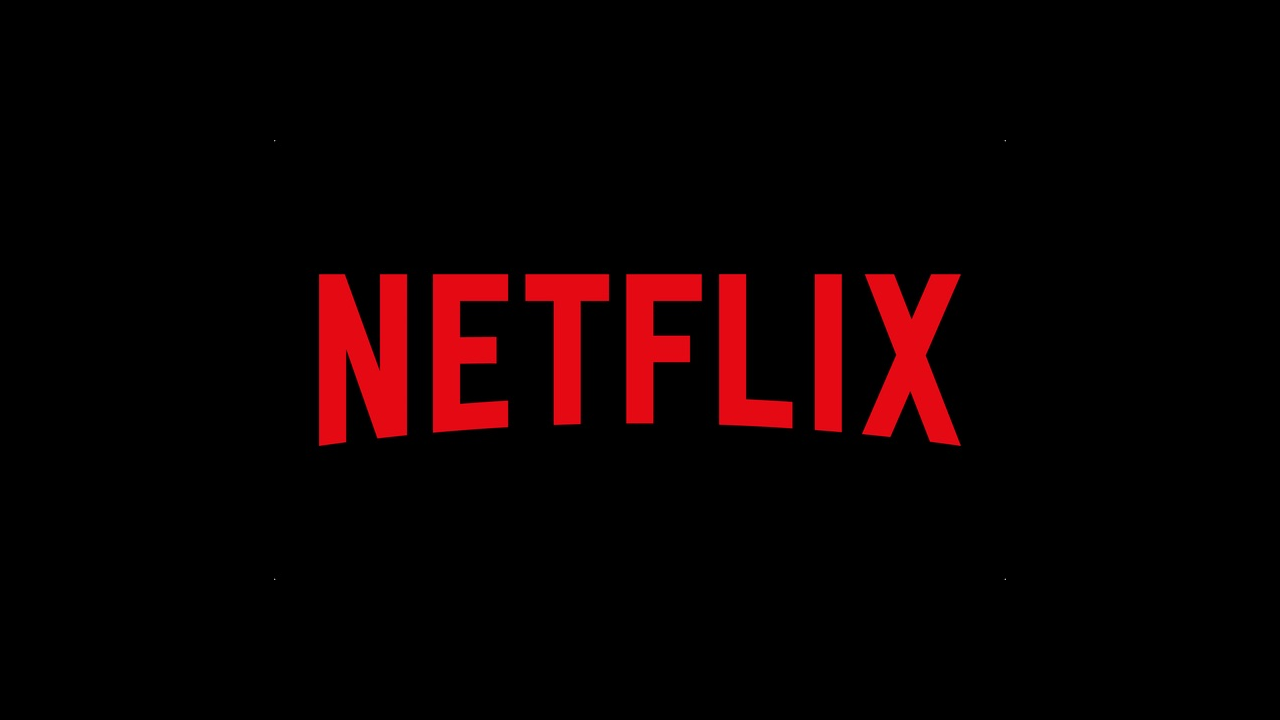

<h3 align="center"> MSc Business Analytics, University College London.</h3>
<h3 align="center"> March, 2022.</h3>

In [1]:
# Set up autosaving every 2 minutes
import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."
%autosave 120


Autosaving every 120 seconds


In [2]:
!pip install wordcloud
!pip install geopandas
!pip install mapclassify
!pip install plotly.express


         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.


         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.       

In [3]:
#importing relevant packages
import numpy as np
import plotly.express as px
import pandas as pd
import os
from numpy import nan as NA
import matplotlib
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
from math import floor
from sklearn.feature_extraction.text import CountVectorizer
import datetime
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import calendar
import networkx as nx
import plotly.figure_factory as ff

In [4]:
!pip uninstall plotlyy


         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.



In [5]:
#load the first dataset
path = '/project/' 
file = 'netflix_titles.csv'
def load_data(data_path=path):
    csv_path = os.path.join(data_path, file)
    return pd.read_csv(csv_path)
df = load_data()
print('Number of observations:', len(df))
df.head()

Number of observations: 8807


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
#initial glance at data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.isna().sum()
# determining any null values that need to be mitigated

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
df['director'].replace(np.nan, 'No Data',inplace  = True)
df['cast'].replace(np.nan, 'No Data',inplace  = True)
df['rating'].replace(np.nan, 'No Data',inplace  = True)
df['duration'].replace(np.nan, 'No Data',inplace  = True)
df['country'].replace(np.nan, 'No Data',inplace  = True)

df.dropna(subset = ['date_added'], inplace=True)
# dealing with null data

In [9]:
df['full_date'] = pd.DatetimeIndex(df['date_added'])
df['full_date'] = pd.to_datetime(df['full_date'].astype(str),format='%Y%m%d %H:%M:%S')
df.head()
# making a new date column with date time index rather than as a string 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,full_date
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Data,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,No Data,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24


In [10]:
df=df.drop(columns='date_added')

In [11]:
df.isna().sum()
# we have successfully dealt with null values

show_id         0
type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
full_date       0
dtype: int64

In [12]:
df['month_added'] = pd.DatetimeIndex(df['full_date']).month
df['month_added']=[calendar.month_abbr[int(i)] if pd.notna(i) else i for i in df['month_added']]
df['year_added'] = pd.DatetimeIndex(df['full_date']).year
df['day_added'] = pd.DatetimeIndex(df['full_date']).day
df.head()
# seperating year month and day for potential visualisation exploration

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,full_date,month_added,year_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,Sep,2021,25
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,Sep,2021,24
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Data,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,Sep,2021,24
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,No Data,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,Sep,2021,24
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,Sep,2021,24


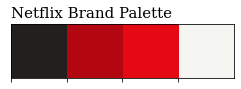

In [13]:
# setting our colour map and font for consistency throughout

colors_list = ['#221f1f', '#b20710', '#e50914','#f5f5f1']

sns.palplot(colors_list)

csfont = {'fontname':'serif'}

plt.title("Netflix Brand Palette",loc='left',fontfamily='serif',fontsize=15)
plt.show()

## Initial data exploration

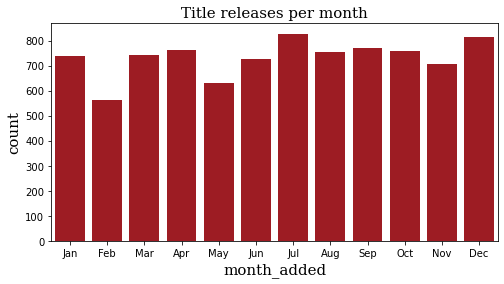

In [14]:
# seeing whether Netflix follows any particular schedule when adding titles
Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(8,4))
plt.title('Title releases per month',size=15,**csfont)
plt.xlabel('xlabel', fontsize=15,**csfont)
plt.ylabel('ylabel', fontsize=15,**csfont)
bar = sns.countplot(x=df['month_added'],order=Months, color=colors_list[1])

plt.savefig('title_releases_per_month.png')

plt.show()

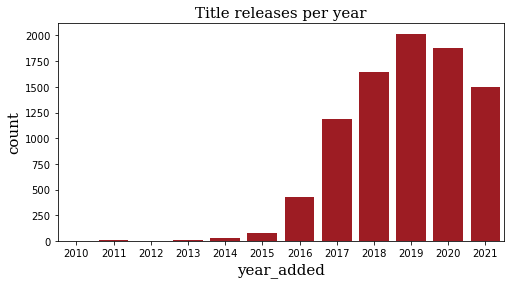

In [15]:
# seeing whether Netflix follows any particular schedule when adding titles
year = [2010, 2011, 2012, 2013, 2014, 2015, 2016,2017,2018,2019,2020,2021]

plt.figure(figsize=(8,4))
plt.title('Title releases per year',size=15,**csfont)
plt.xlabel('Year', fontsize=15,**csfont)
plt.ylabel('Count', fontsize=15,**csfont)
bar = sns.countplot(x=df['year_added'],order=year, color=colors_list[1])

plt.savefig('title_releases_per_month.png')

plt.show()

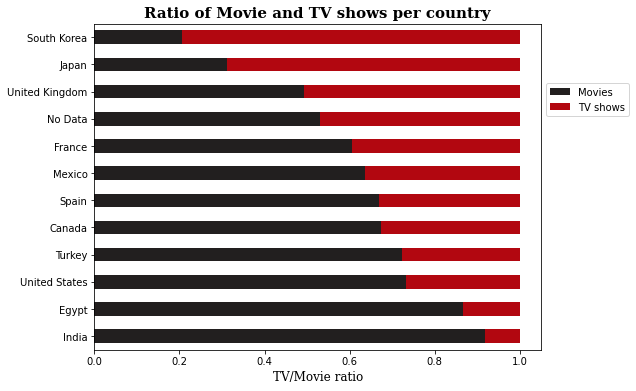

In [16]:
# determining the ratio between movie and tv show per country
country_order = df['country'].value_counts()[:12].index
group = df[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order]

ax = group.apply(lambda x:x/x.sum(), axis=1).sort_values(by='Movie',ascending=False).plot(kind='barh', stacked=True, legend=False,color=colors_list[0:2],
                                                figsize=(8,6))

group['sum'] = group.sum(axis=1)
group_ratio = (group.T / group['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]
group_sum=group['sum']


ax.set_title('Ratio of Movie and TV shows per country',**csfont,fontsize=15,fontweight='bold')

plt.legend(['Movies', 'TV shows'], bbox_to_anchor=(1.0, 0.7),loc='lower left',fontsize = 10)

plt.xlabel('TV/Movie ratio',**csfont,fontsize=12)

plt.savefig('ratio of tv and movies per country.png')
plt.show()

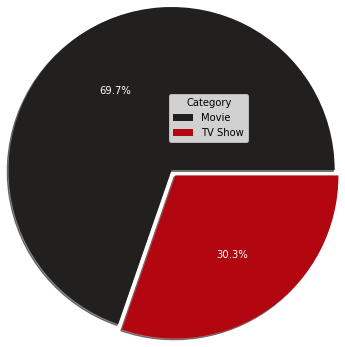

In [17]:
# finding ratio of movies to tv shows overall
fig1, ax1 = plt.subplots(figsize=(5,3))
df_pie = pd.DataFrame(df["type"].value_counts())
df_pie.reset_index(inplace = True)
explode = [0, 0.1]

ax1.pie(df_pie["type"], labels = df_pie["index"], autopct='%1.1f%%', 
        radius = 2.5, colors = colors_list, shadow =True,
        explode = explode,textprops={'color':"w"}
    )
plt.legend(loc = 'upper right', title='Category')

plt.savefig('ratio of movies to tv shows.png')
plt.show()

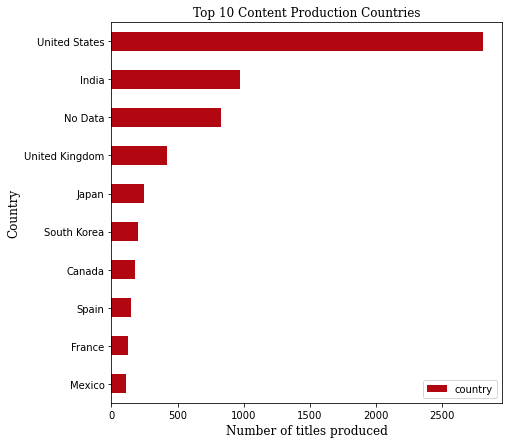

In [18]:
# finding countries which produce the most tv/movie titles
top_10_countries=pd.DataFrame(df['country'].value_counts())
top_10_countries=top_10_countries.sort_values(by='country',ascending=False).head(10)
top_10_countries=top_10_countries.sort_values(by='country',ascending=True)

top_10_countries.plot(kind='barh', figsize=(7,7),color=colors_list[1])
plt.title('Top 10 Content Production Countries',**csfont,fontsize=12)
plt.xlabel('Number of titles produced',**csfont,fontsize=12)
plt.ylabel('Country',**csfont,fontsize=12)

plt.savefig('Top 10 content production countries.png')
plt.show()

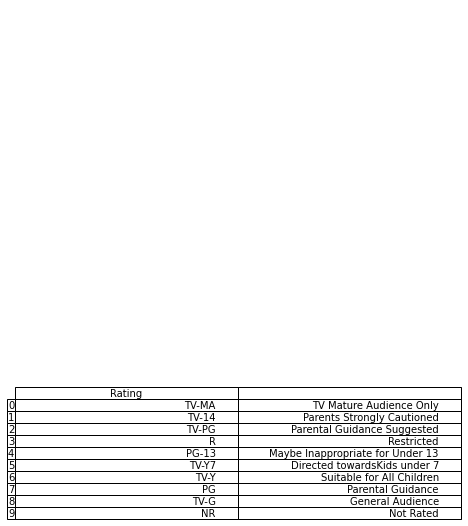

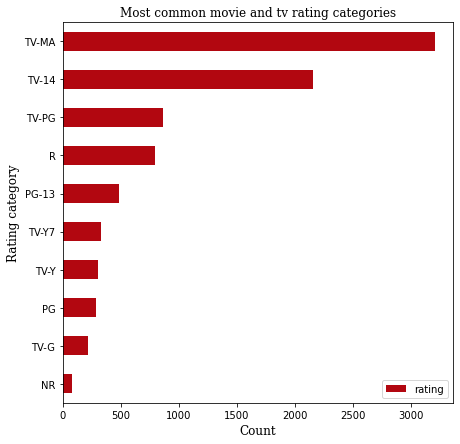

In [19]:
%matplotlib inline
# finding which ratings are most common on Netflix
ratings = ['TV Mature Audience Only','Parents Strongly Cautioned','Parental Guidance Suggested','Restricted','Maybe Inappropriate for Under 13','Directed towardsKids under 7',
          'Suitable for All Children','Parental Guidance','General Audience','Not Rated']

rating_index = ['TV-MA','TV-14','TV-PG','R','PG-13','TV-Y7','TV-Y','PG','TV-G','NR']

rating_df=pd.DataFrame(ratings,rating_index)
rating_df=rating_df.reset_index()
rating_df=rating_df.rename(columns={'index':'Rating'})
rating_df=rating_df.rename(columns={0:' '})

fig = plt.figure(figsize=(8,7))

top_10_ratings=pd.DataFrame(df['rating'].value_counts())
top_10_ratings=top_10_ratings.sort_values(by='rating',ascending=False).head(10)
top_10_ratings=top_10_ratings.sort_values(by='rating',ascending=True)

ax1 =top_10_ratings.plot(kind='barh', figsize=(7,7),color=colors_list[1])
plt.title('Most common movie and tv rating categories',**csfont,fontsize=12)
plt.xlabel('Count',**csfont,fontsize=12)
plt.ylabel('Rating category',**csfont,fontsize=12)

plt.savefig('proportion of title ratings.png')

ax2 = fig.add_subplot()
ax2.axis('off')
table = ax2.table(cellText = rating_df.values, rowLabels = rating_df.index, colLabels=rating_df.columns)
table.auto_set_font_size(True)
table.set_fontsize(14)

In [20]:
# creating a genre variable
df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 

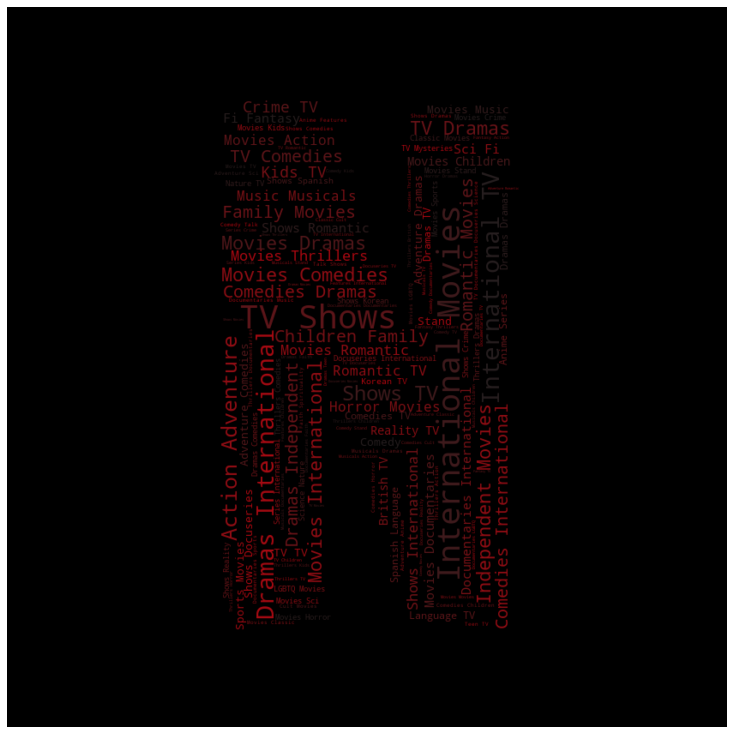

In [21]:
# making a netflix logo shaped wordcloud with all genres
paintcmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])
text = str(list(df['genre'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')
mask = np.array(Image.open('/project/netflix-logo-png-transparent-image-png-arts-82874.png'))
wordcloud = WordCloud(background_color = 'black', width = 500,  height = 200,colormap=paintcmap, max_words = 200, mask = mask).generate(text)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

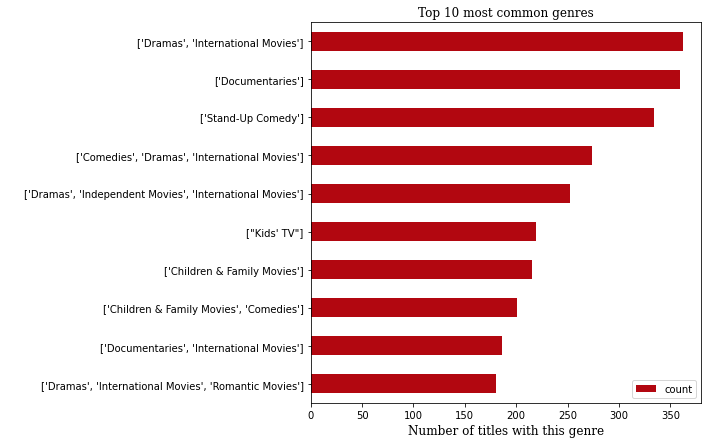

In [22]:
# finding the genres which are most common 
df['genre']=df['genre'].astype(str)
top_genres=df['genre'].value_counts()
top_genres=pd.DataFrame(top_genres)
top_genres=top_genres.rename(columns={'genre':'count'})
top_genres=top_genres.rename(columns={'index':'genre'})
top_genres=top_genres.sort_values(by='count',ascending=False).head(10)
top_genres=top_genres.sort_values(by='count',ascending=True)

top_genres.plot(kind='barh', figsize=(7,7),color=colors_list[1])
plt.title('Top 10 most common genres',**csfont,fontsize=12)
plt.xlabel('Number of titles with this genre',**csfont,fontsize=12)
plt.ylabel(' ',**csfont,fontsize=12)

plt.savefig('Top 10 genres.png')
plt.show()

In [23]:
#load the second dataset
path = '/project/' 
file = 'all-weeks-countries.csv'
def load_data(data_path=path):
    csv_path = os.path.join(data_path, file)
    return pd.read_csv(csv_path)
df2 = load_data()
print('Number of observations:', len(df))
df2.head()

Number of observations: 8797


,country_name,country_iso2,week,category,weekly_rank,show_title,season_title,cumulative_weeks_in_top_10
0,Argentina,AR,2022-01-16,Films,1,Brazen,NaN,1
1,Argentina,AR,2022-01-16,Films,2,Mother/Android,NaN,2
2,Argentina,AR,2022-01-16,Films,3,The Clovehitch Killer,NaN,1
3,Argentina,AR,2022-01-16,Films,4,The Secret Life of Pets 2,NaN,1
4,Argentina,AR,2022-01-16,Films,5,Don't Look Up,NaN,4


In [24]:
df2.info()
# looking at the data characteristics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54520 entries, 0 to 54519
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   country_name                54520 non-null  object
 1   country_iso2                54520 non-null  object
 2   week                        54520 non-null  object
 3   category                    54520 non-null  object
 4   weekly_rank                 54520 non-null  int64 
 5   show_title                  54520 non-null  object
 6   season_title                26984 non-null  object
 7   cumulative_weeks_in_top_10  54520 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [25]:
df2['week'].max()
# latest data is from janurary 2022, so is very current

'2022-01-16'

In [26]:
df2['week'].min()
# oldest data is from july 2021

'2021-07-04'

In [27]:
df2.isna().sum()
# finding any null values

country_name                      0
country_iso2                      0
week                              0
category                          0
weekly_rank                       0
show_title                        0
season_title                  27536
cumulative_weeks_in_top_10        0
dtype: int64

In [28]:
# renaming the column week as it actually represents the full date
df2=df2.rename(columns={'week':'date'})

In [29]:
df2['season_title'].replace(np.nan, 'No Data',inplace  = True)
# filling null values with string - no data

In [30]:
# merging the two dataframes so we can determine which genres are most popular 
genredf=df.rename(columns={'title':'show_title'})
top_genres=pd.merge(genredf,df2, on='show_title')
top_genres=top_genres.groupby(['genre','cumulative_weeks_in_top_10']).sum()
top_genres=top_genres.sort_values(by='cumulative_weeks_in_top_10',ascending=False).head(20)
top_genres

release_year  \
genre                                              cumulative_weeks_in_top_10                 
['International TV Shows', 'Korean TV Shows', '... 29                                  2019   
['International TV Shows', 'Romantic TV Shows',... 29                                  2007   
['International TV Shows', 'TV Action & Adventu... 29                                  4036   
['International TV Shows', 'Korean TV Shows', '... 28                                  2019   
['International TV Shows', 'TV Action & Adventu... 28                                  4036   
['International TV Shows', 'Romantic TV Shows',... 28                                  2007   
                                                   27                                  2007   
['International TV Shows', 'TV Action & Adventu... 27                                  6054   
['International TV Shows', 'Korean TV Shows', '... 27                                  2019   
['International TV Shows', 'Korean TV Shows', '... 27                                  2020   
                                                   26                                  2020   
['International TV Shows', 'Korean TV Shows', '... 26                                  2019   
['International TV Shows', 'TV Action & Adventu... 26                                  6054   
['International TV Shows', 'Romantic TV Shows',... 26                                  2007   
['International TV Shows', 'TV Action & Adventu... 25                                  6054   
['International TV Shows', 'Romantic TV Shows',... 25                                  2007   
['International TV Shows', 'Korean TV Shows', '... 25                                  2019   
['International TV Shows', 'Korean TV Shows', '... 25                                  2020   
['International TV Shows', 'Romantic TV Shows',... 24                                  2007   
['International TV Shows', 'Korean TV Shows', '... 24                                  2020   

                                                                               year_added  \
genre                                              cumulative_weeks_in_top_10               
['International TV Shows', 'Korean TV Shows', '... 29                                2019   
['International TV Shows', 'Romantic TV Shows',... 29                                2021   
['International TV Shows', 'TV Action & Adventu... 29                                4042   
['International TV Shows', 'Korean TV Shows', '... 28                                2019   
['International TV Shows', 'TV Action & Adventu... 28                                4042   
['International TV Shows', 'Romantic TV Shows',... 28                                2021   
                                                   27                                2021   
['International TV Shows', 'TV Action & Adventu... 27                                6063   
['International TV Shows', 'Korean TV Shows', '... 27                                2019   
['International TV Shows', 'Korean TV Shows', '... 27                                2020   
                                                   26                                2020   
['International TV Shows', 'Korean TV Shows', '... 26                                2019   
['International TV Shows', 'TV Action & Adventu... 26                                6063   
['International TV Shows', 'Romantic TV Shows',... 26                                2021   
['International TV Shows', 'TV Action & Adventu... 25                                6063   
['International TV Shows', 'Romantic TV Shows',... 25                                2021   
['International TV Shows', 'Korean TV Shows', '... 25                                2019   
['International TV Shows', 'Korean TV Shows', '... 25                                2020   
['International TV Shows', 'Romantic TV Shows',... 24                                2021   
['International TV Shows', 'Korean 

In [31]:
#load the final dataset
path = '/project/' 
file = 'all-weeks-global.csv'
def load_data(data_path=path):
    csv_path = os.path.join(data_path, file)
    return pd.read_csv(csv_path)
df3 = load_data()
print('Number of observations:', len(df))
df3.head()

Number of observations: 8797


,week,category,weekly_rank,show_title,season_title,weekly_hours_viewed,cumulative_weeks_in_top_10
0,2022-01-16,Films (English),1,Brazen,NaN,45340000,1
1,2022-01-16,Films (English),2,Don't Look Up,NaN,28390000,4
2,2022-01-16,Films (English),3,Mother/Android,NaN,23170000,2
3,2022-01-16,Films (English),4,The Secret Life of Pets 2,NaN,9390000,1
4,2022-01-16,Films (English),5,Just Go With It,NaN,8790000,3


In [32]:
df3.info()
# looking at the data characteristics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160 entries, 0 to 1159
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   week                        1160 non-null   object
 1   category                    1160 non-null   object
 2   weekly_rank                 1160 non-null   int64 
 3   show_title                  1160 non-null   object
 4   season_title                570 non-null    object
 5   weekly_hours_viewed         1160 non-null   int64 
 6   cumulative_weeks_in_top_10  1160 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 63.6+ KB


In [33]:
# changing the format of week for clearer understanding 
df3['year']=pd.DatetimeIndex(data=df3['week']).year
df3['month']=pd.DatetimeIndex(data=df3['week']).month
df3['day']=pd.DatetimeIndex(df3['week']).day
df3=df3.drop(columns='week')

In [34]:
# merging the two dataframes so we can determine which genres are most popular 
df=df.rename(columns={'title':'show_title'})
top_genres=pd.merge(df,df3, on='show_title')
top_genres=top_genres.groupby(['genre','weekly_hours_viewed']).sum()
top_genres=top_genres.sort_values(by='weekly_hours_viewed',ascending=False).head(10)
top_genres=top_genres.reset_index()
top_genres=top_genres[['genre','weekly_hours_viewed']]

## Category analysis

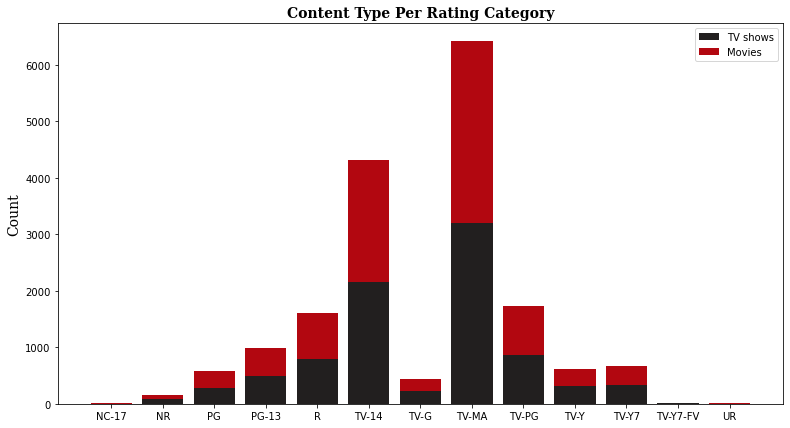

In [35]:
order = df.rating.unique()
count_movies = df.groupby('rating')['show_title'].count().reset_index()
count_shows = df.groupby('rating')['show_title'].count().reset_index()
count_shows.sort_values(by="rating", ascending=True)
# dropping column with no data as is non necessary for visualisations 
count_movies.drop(count_movies.index[:4],inplace=True)
count_shows.drop(count_shows.index[:4],inplace=True)
count_shows.drop(count_shows.index[2:3],inplace=True)
count_movies.drop(count_movies.index[2:3],inplace=True)
fig1=plt.figure(figsize=(13,7))
plt.title('Content Type Per Rating Category',fontsize=14,**csfont,fontweight='bold')
plt.ylabel('Count',fontsize=14,**csfont)

plt.bar(count_movies.rating, count_movies.show_title,color=colors_list[0])
plt.bar(count_movies.rating, count_shows.show_title, bottom=count_movies.show_title,color=colors_list[1])
plt.legend(['TV shows','Movies'])
plt.savefig('content type per rating category.png')
plt.show(fig1)

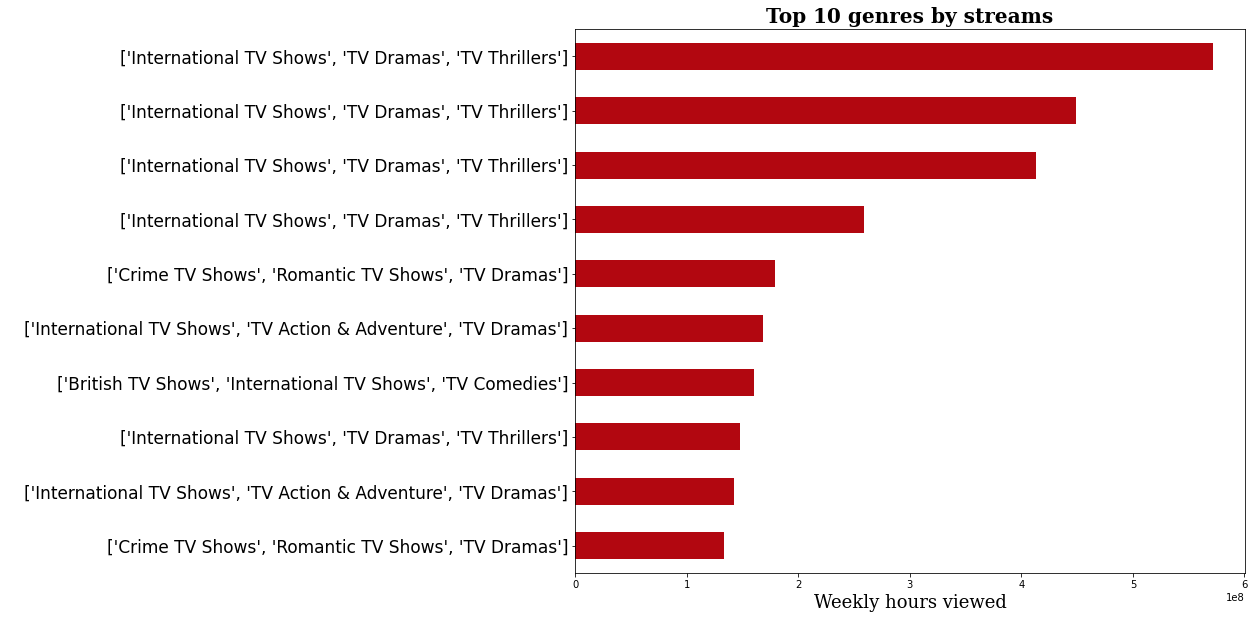

In [36]:
# finding top genres by weekly hours viewed
top_genres=top_genres.sort_values(by='weekly_hours_viewed',ascending=True)
y_label = top_genres['genre']
ax=top_genres.plot(kind='barh', figsize=(12,10),color=colors_list[1])
plt.title('Top 10 genres by streams',**csfont,fontsize=20,fontweight='bold')
plt.xlabel('Weekly hours viewed',**csfont,fontsize=18)
plt.ylabel(' ',**csfont,fontsize=12)
ax.set_yticklabels(y_label,fontsize=15)
ax.get_legend().remove()
ax = plt.gca()
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(17)

plt.savefig('Top 10 genres by streams.png')
plt.show()

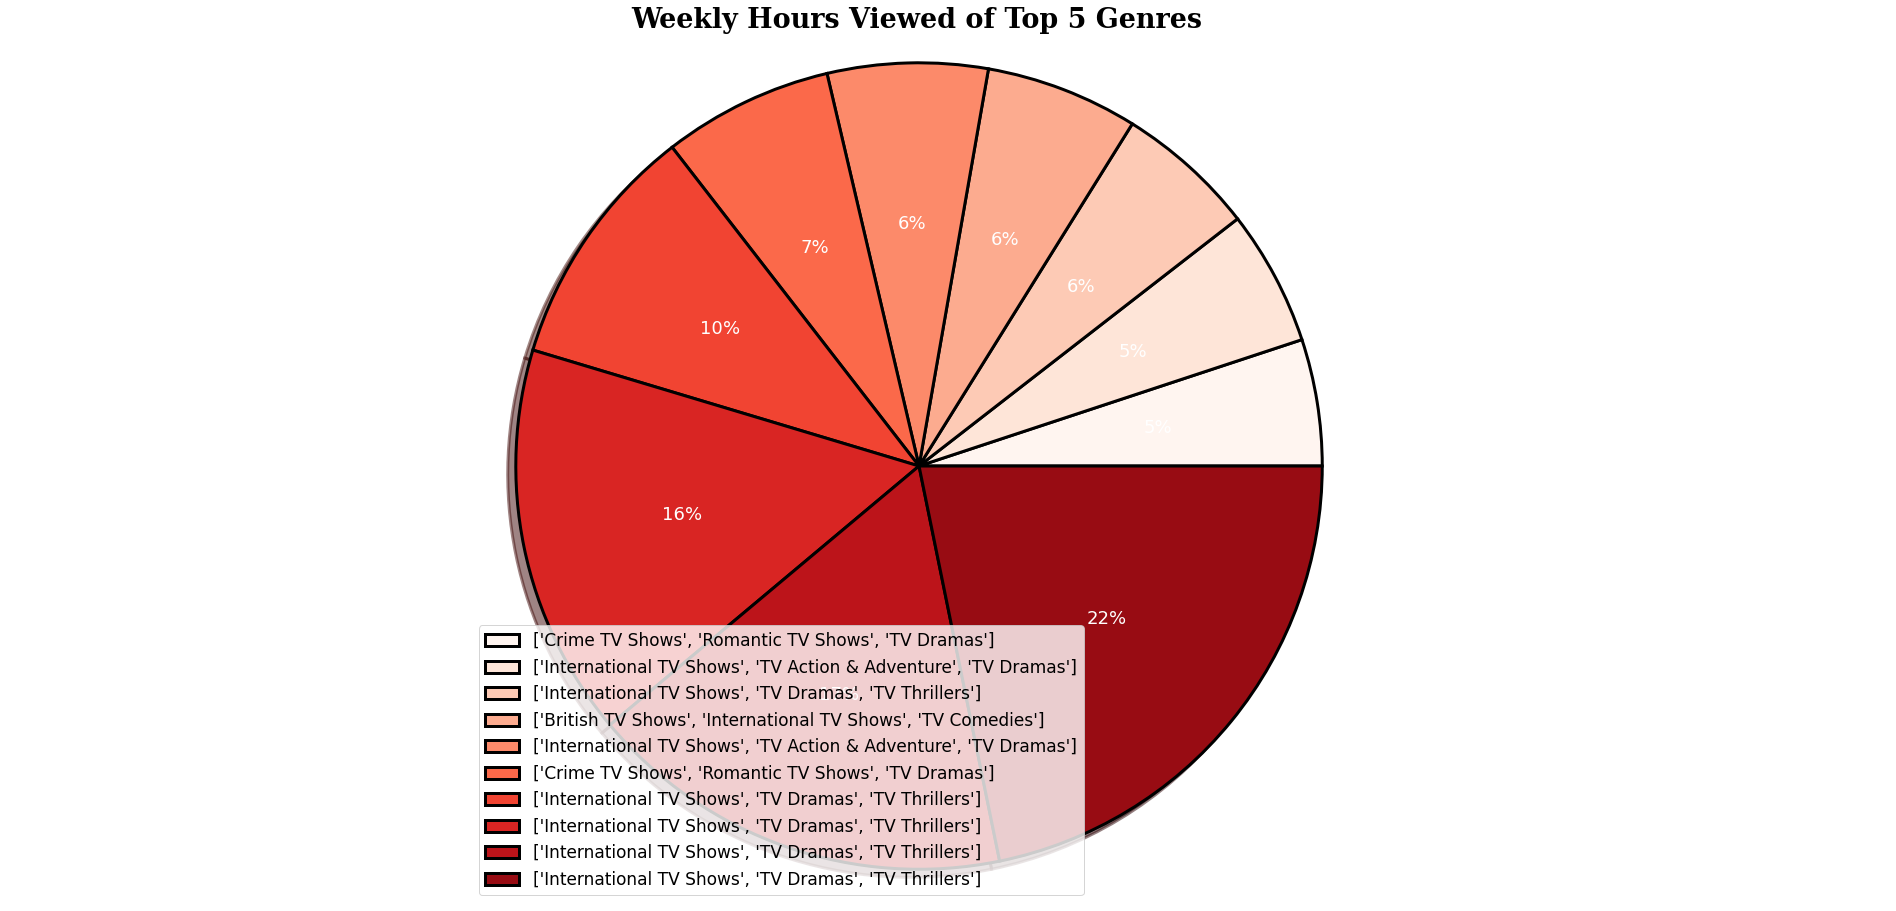

In [37]:
# visualising the proportion of weekly hours viewed for each of the top 5 genres
fig1, ax1 = plt.subplots(figsize=(16,16))
df_pie = top_genres["weekly_hours_viewed"]
df_pie=df_pie
explode = [0, 0, 0, 0, 0.2]

theme = plt.get_cmap('Reds')
ax1.set_prop_cycle("color", [theme(1. * i / len(df_pie))
                             for i in range(len(df_pie))])

ax1.pie(df_pie, labels = top_genres.genre, autopct='%.0f%%', 
        shadow =True,wedgeprops={'linewidth': 3.0, 'edgecolor': 'black'},
        textprops={'color':"w",'fontsize':18}
    )

ax1.axis('equal')
plt.legend(loc = 'best', fontsize=17)
plt.title('Weekly Hours Viewed of Top 5 Genres',fontsize=27,fontweight='bold',**csfont)

plt.savefig('ratio of hours viewed in top 5 genres.png')
plt.show()

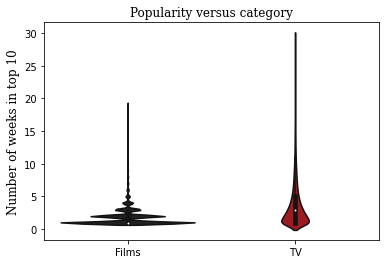

In [38]:
# determining longevity of popularity between tv shows and movies
fig, ax = plt.subplots()

ax=sns.violinplot(x = "category", y = "cumulative_weeks_in_top_10", data = df2, figsize=(15,15),palette=colors_list)

ax.set_title('Popularity versus category',**csfont,fontsize=12)
ax.set_xlabel(' ')
ax.set_ylabel('Number of weeks in top 10',**csfont,fontsize=12)



plt.show()

## Top titles and actors 

In [39]:
# finding top 10 netflix titles by stream count
df3['hours_viewed_per_week'] = df3["weekly_hours_viewed"].map('{:,.2f}'.format)

top_titles = df3.sort_values(by='weekly_hours_viewed', ascending=False)

top_titles = pd.DataFrame(top_titles[['show_title', 'weekly_hours_viewed','hours_viewed_per_week', 'category', 'cumulative_weeks_in_top_10','year','month','day']])

top_titles.head(10)

,show_title,weekly_hours_viewed,hours_viewed_per_week,category,cumulative_weeks_in_top_10,year,month,day
630,Squid Game,571760000,"571,760,000.00",TV (Non-English),3,2021,10,3
670,Squid Game,448730000,"448,730,000.00",TV (Non-English),2,2021,9,26
590,Squid Game,412940000,"412,940,000.00",TV (Non-English),4,2021,10,10
550,Squid Game,258840000,"258,840,000.00",TV (Non-English),5,2021,10,17
790,Money Heist,201910000,"201,910,000.00",TV (Non-English),1,2021,9,5
270,Money Heist,189920000,"189,920,000.00",TV (Non-English),7,2021,12,5
500,You,179000000,"179,000,000.00",TV (English),2,2021,10,24
140,The Witcher,168460000,"168,460,000.00",TV (English),2,2021,12,26
580,Maid,166520000,"166,520,000.00",TV (English),2,2021,10,10
660,Sex Education,160420000,"160,420,000.00",TV (English),2,2021,9,26


In [40]:
# dropping any duplicates 
top_titles = top_titles.drop_duplicates(subset='show_title',keep='first',inplace=False)

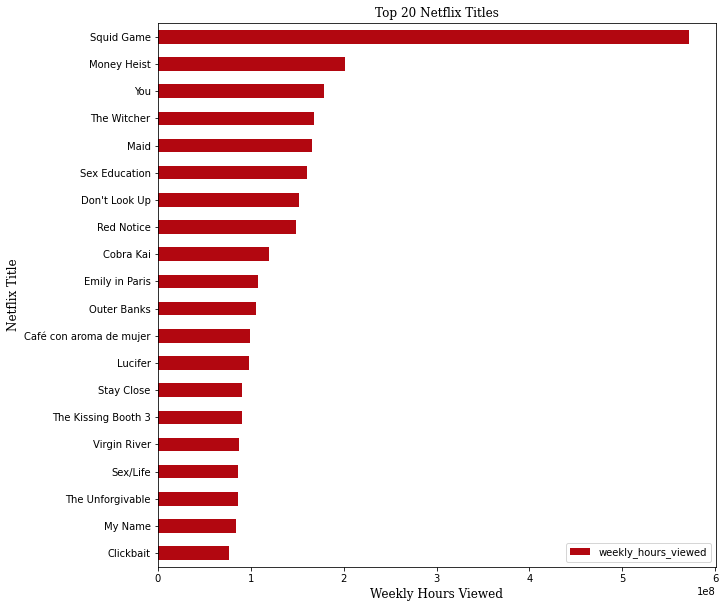

In [41]:
# displaying the top 20 shows 
top_df=top_titles[['show_title','weekly_hours_viewed']]
top_df=top_df.set_index(['show_title'])
top_df=top_df.sort_values(by='weekly_hours_viewed',ascending=False).head(20)
top_df=top_df.sort_values(by='weekly_hours_viewed',ascending=True)

fig=top_df.plot(kind='barh', figsize=(10,10),color=colors_list[1])
plt.title('Top 20 Netflix Titles',**csfont,fontsize=12)
plt.xlabel('Weekly Hours Viewed',**csfont,fontsize=12)
plt.ylabel('Netflix Title',**csfont,fontsize=12)

plt.savefig('top20 titles.png')
plt.show(fig)

In [42]:
# finding the most popular casts 
df4=pd.merge(df,df3, on='show_title')
top_cast=df4.groupby(['cast','weekly_hours_viewed']).sum()
top_cast=top_cast.sort_values(by='weekly_hours_viewed',ascending=False)
top_cast=top_cast.reset_index()
top_cast=top_cast.drop_duplicates(subset=['cast'],keep='first')
top_cast=pd.DataFrame(top_cast[['cast','weekly_hours_viewed','cumulative_weeks_in_top_10']])

In [43]:
# splitting the cast list into individual actors
actor_df=top_cast['cast'].str.split(',', expand=True).rename(columns = lambda x: "actor"+str(x+1))

In [44]:
actor_df = actor_df[actor_df.values!='None']

In [45]:
# joining with data
top_cast=top_cast.join(actor_df)

In [46]:
# merging with main dataset
data_frame=top_cast.merge(df4,on='cast')

In [47]:
data_frame=data_frame.drop_duplicates(subset=['cast'],keep='first')

In [48]:
# renaming columns for nicer looking columns in the graph 
data_frame=data_frame.rename(columns={'cumulative_weeks_in_top_10_y':'Weeks in top 10'})
data_frame=data_frame.rename(columns={'weekly_rank':'Weekly rank'})
data_frame=data_frame.rename(columns={'actor1':'Actor'})

In [49]:
data_frame=data_frame.sort_values(by='Weeks in top 10',ascending=False).head(20)
data_frame=data_frame.sort_values(by='Weeks in top 10',ascending=True)

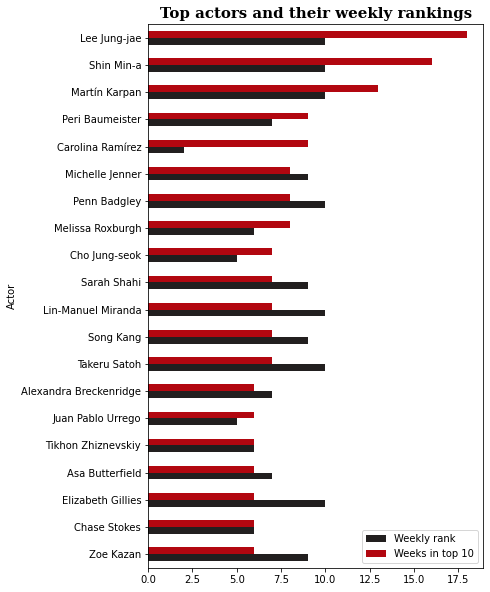

In [50]:
# displaying top actors and their corrosponding rankings 
fig=data_frame.plot(x='Actor', y=['Weekly rank','Weeks in top 10'], kind="barh", figsize=(6, 10),color=colors_list)
plt.title('Top actors and their weekly rankings',fontsize=15, **csfont, fontweight='bold')
plt.savefig('top actors and their rankings.png')
plt.show(fig)

In [51]:
top_cast=top_cast.drop_duplicates(subset=['cast'],keep='first')
top_cast['cast']=top_cast['cast'].str.split(',', expand=True).rename(columns = lambda x: "actor"+str(x+1))

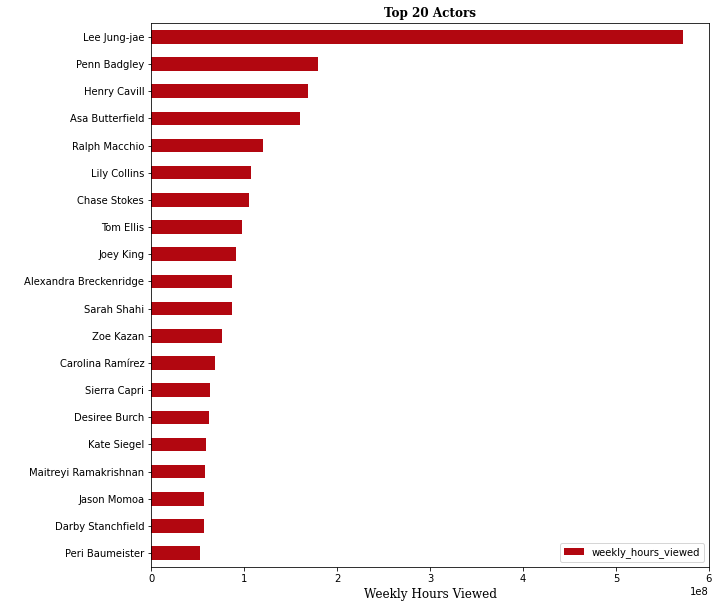

In [52]:
# displaying top 20 actors by hours viewed
top_cast=top_cast[['cast','weekly_hours_viewed']]
top_cast=top_cast.set_index(['cast'])
top_cast=top_cast.sort_values(by='weekly_hours_viewed',ascending=False).head(20)
top_cast=top_cast.sort_values(by='weekly_hours_viewed',ascending=True)
top_cast.plot(kind='barh', figsize=(10,10),color=colors_list[1])
plt.title('Top 20 Actors',**csfont,fontsize=12,fontweight='bold')
plt.xlabel('Weekly Hours Viewed',**csfont,fontsize=12)
plt.ylabel(' ',**csfont,fontsize=12)

plt.savefig('top20 casts.png')
plt.show()

In [53]:
top_cast=top_cast.sort_values(by='weekly_hours_viewed',ascending=False)
top_cast=top_cast.head(20)

In [54]:
top_cast=top_cast.reset_index()

In [124]:
fig3 = ff.create_table(top_cast,colorscale=colors_list)
fig3.show()

In [56]:
top_df=top_genres['genre'].str.split(',', expand=True).rename(columns = lambda x: "genre"+str(x+1))

In [58]:
top_genres=top_df.join(top_genres)

In [114]:
# finding highest watched genres
fig4 = px.bar(top_genres, x='genre2', y='weekly_hours_viewed',
             hover_data=['weekly_hours_viewed'], color='genre',color_discrete_sequence=colors_list)

fig4.update_layout(showlegend=False)
fig4.update_layout(template="plotly_dark")
fig4.show()
fig = px.bar(top_genres, x='genre1', y='weekly_hours_viewed',
             hover_data=['weekly_hours_viewed'], color='genre',color_discrete_sequence=colors_list)

fig.update_layout(showlegend=False)
fig.update_layout(template="plotly_dark")
fig.show()

In [60]:
top_genres.iloc[:,:3]

,genre1,genre2,genre3
9,['Crime TV Shows','Romantic TV Shows','TV Dramas']
8,['International TV Shows','TV Action & Adventure','TV Dramas']
7,['International TV Shows','TV Dramas','TV Thrillers']
6,['British TV Shows','International TV Shows','TV Comedies']
5,['International TV Shows','TV Action & Adventure','TV Dramas']
4,['Crime TV Shows','Romantic TV Shows','TV Dramas']
3,['International TV Shows','TV Dramas','TV Thrillers']
2,['International TV Shows','TV Dramas','TV Thrillers']
1,['International TV Shows','TV Dramas','TV Thrillers']
0,['International TV Shows','TV Dramas','TV Thrillers']


In [61]:
x=top_genres.iloc[:,:3]
x

,genre1,genre2,genre3
9,['Crime TV Shows','Romantic TV Shows','TV Dramas']
8,['International TV Shows','TV Action & Adventure','TV Dramas']
7,['International TV Shows','TV Dramas','TV Thrillers']
6,['British TV Shows','International TV Shows','TV Comedies']
5,['International TV Shows','TV Action & Adventure','TV Dramas']
4,['Crime TV Shows','Romantic TV Shows','TV Dramas']
3,['International TV Shows','TV Dramas','TV Thrillers']
2,['International TV Shows','TV Dramas','TV Thrillers']
1,['International TV Shows','TV Dramas','TV Thrillers']
0,['International TV Shows','TV Dramas','TV Thrillers']


## Time series analysis

In [62]:
# creating the main dataset
df4=pd.merge(df,df3, on='show_title')

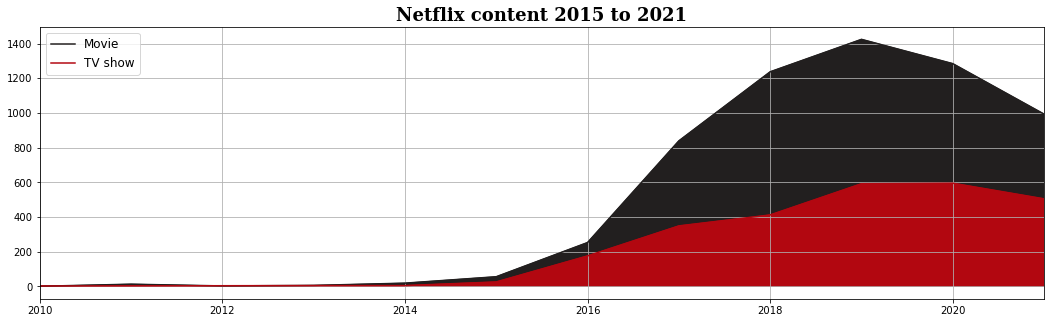

In [63]:
# displaying netflix content over time
fig, ax = plt.subplots(1, 1, figsize=(18, 5))


for x,y in enumerate(df['type'].value_counts().index):
    graph = df[df['type']==y]['year_added'].value_counts().sort_index()
    fig3=ax.plot(graph.index, graph, color=colors_list[x])
    ax.fill_between(graph.index, 0, graph, color=colors_list[x])

ax.set_xlim(2010,2021)

ax.grid()
legend = ['Movie','TV show']
plt.legend(legend,loc='best',fontsize=12)
plt.title('Netflix content 2015 to 2021',fontsize=18,**csfont,fontweight='bold')

plt.savefig('content 2015 to 2021.png')
plt.show()

In [64]:
df2=df2.rename(columns={'country_name':'country'})

In [65]:
df=df.merge(df3,on='show_title')

In [92]:
# displaying the stream counts per content type from 2017 to 2021
fig5 = px.bar(df4, x='year_added', y="weekly_hours_viewed",color='type',color_discrete_sequence=colors_list[2:4])
fig5.update_layout(template="plotly_dark")



fig5.update_layout(legend=dict(y=0.5, traceorder='reversed', font_size=13))
fig5.show()

## Country analysis 

In [93]:
#finding top streamed shows and the countries from which theyre produced
top_rated=df4[df4['country']!='No Data']
top_rated=top_rated.sort_values(by='weekly_hours_viewed',ascending=False).head(20)
fig6=px.sunburst(
    top_rated,
    path=['show_title','country'],
    values='weekly_hours_viewed',color='weekly_hours_viewed',
    color_continuous_scale=colors_list
    )

fig6.update_traces(hovertext='weekly_hours_viewed')
plt.savefig('streaming hours per country.png')

fig6.show()

<Figure size 432x288 with 0 Axes>

In [68]:
# as majority are US or UK, want to also find other most popular countries
top_rated= top_rated[top_rated.country != 'United States']
top_rated= top_rated[top_rated.country != 'United Kingdom']

In [70]:
# renaming the country code column for easier understanding
df2 = df2.rename(columns={'country_iso2':"country_code"})
df2.head()

,country,country_code,date,category,weekly_rank,show_title,season_title,cumulative_weeks_in_top_10
0,Argentina,AR,2022-01-16,Films,1,Brazen,No Data,1
1,Argentina,AR,2022-01-16,Films,2,Mother/Android,No Data,2
2,Argentina,AR,2022-01-16,Films,3,The Clovehitch Killer,No Data,1
3,Argentina,AR,2022-01-16,Films,4,The Secret Life of Pets 2,No Data,1
4,Argentina,AR,2022-01-16,Films,5,Don't Look Up,No Data,4


In [76]:
# renaming columns for clarity
df2=df2.rename(columns={'country':'Country'})

In [78]:
# getting the mean rank for each country 
country_stats=df2.groupby(by=["Country",'cumulative_weeks_in_top_10']).mean()

In [79]:
country_stats=country_stats.reset_index()
country_stats.head()

,Country,cumulative_weeks_in_top_10,weekly_rank
0,Argentina,1,5.602459
1,Argentina,2,4.712230
2,Argentina,3,5.682540
3,Argentina,4,6.090909
4,Argentina,5,5.142857


In [80]:
region_code = df2['Country']
region_code = pd.DataFrame(df2.Country.value_counts())
region_code = region_code.reset_index()
region_code.columns = ['Country','counts']

In [81]:
# loading the geo codes data for the map visualisations
codes=pd.read_csv('/project/countries.csv')

In [82]:
codes = codes.rename(columns={'name':'Country'})

In [83]:
# joining the codes 
geomap = pd.merge(left=codes, right=country_stats, left_on='Country', right_on='Country')
geomap.head()

,country,latitude,longitude,Country,cumulative_weeks_in_top_10,weekly_rank
0,AE,23.424076,53.847818,United Arab Emirates,1,5.828794
1,AE,23.424076,53.847818,United Arab Emirates,2,4.827815
2,AE,23.424076,53.847818,United Arab Emirates,3,5.117647
3,AE,23.424076,53.847818,United Arab Emirates,4,6.026316
4,AE,23.424076,53.847818,United Arab Emirates,5,5.764706


In [84]:
geomap=geomap.sort_values(by='weekly_rank',ascending=False)

In [85]:
geomap.drop_duplicates(keep='first')

,country,latitude,longitude,Country,cumulative_weeks_in_top_10,weekly_rank
1078,MY,4.210484,101.975766,Malaysia,22,10.0
54,AT,47.516231,14.550072,Austria,12,10.0
469,ES,40.463667,-3.749220,Spain,12,10.0
1304,PK,30.375321,69.345116,Pakistan,27,10.0
320,CY,35.126413,33.429859,Cyprus,14,10.0
...,...,...,...,...,...,...
1052,MX,23.634501,-102.552784,Mexico,25,2.0
297,CR,9.748917,-83.753428,Costa Rica,20,2.0
1638,UA,48.379433,31.165580,Ukraine,19,2.0
1056,MX,23.634501,-102.552784,Mexico,29,2.0


In [86]:
# make a function to extract decade for each value 
def extract_decade(x):
    return str(floor(x/10)*10)+"s"

df["decade"] = df["release_year"].apply(extract_decade)

In [94]:
# make a interactive map for popularity of shows globally 
fig7 = px.density_mapbox(geomap, lat='latitude', lon='longitude', z='cumulative_weeks_in_top_10', radius=7,
                        center=dict(lat=0, lon=180), zoom=0,opacity=0.7,
                       color_continuous_scale=colors_list)
fig7.update_layout(mapbox_style="carto-darkmatter", mapbox_accesstoken='mytoken')
fig7.show()

## Converting our final visualisations into javascript

In [88]:
import plotly.io as pio
pio.write_html(fig, file='index.html', auto_open=True)

In [115]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [118]:
embed_string = plot(fig, output_type='div', include_plotlyjs="cdn")

In [119]:
print(embed_string)

<div>                        <script type="text/javascript">window.PlotlyConfig = {MathJaxConfig: 'local'};</script>
        <script src="https://cdn.plot.ly/plotly-2.9.0.min.js"></script>                <div id="9de24868-f702-401c-a851-e843ab17dc06" class="plotly-graph-div" style="height:100%; width:100%;"></div>            <script type="text/javascript">                                    window.PLOTLYENV=window.PLOTLYENV || {};                                    if (document.getElementById("9de24868-f702-401c-a851-e843ab17dc06")) {                    Plotly.newPlot(                        "9de24868-f702-401c-a851-e843ab17dc06",                        [{"alignmentgroup":"True","hovertemplate":"genre=['Crime TV Shows', 'Romantic TV Shows', 'TV Dramas']<br>genre2=%{x}<br>weekly_hours_viewed=%{y}<extra></extra>","legendgroup":"['Crime TV Shows', 'Romantic TV Shows', 'TV Dramas']","marker":{"color":"#221f1f","pattern":{"shape":""}},"name":"['Crime TV Shows', 'Romantic TV Shows', 'TV Dram

In [121]:
embed_string = plot(fig2, output_type='div', include_plotlyjs="cdn")

In [122]:
print(embed_string)

<div>                        <script type="text/javascript">window.PlotlyConfig = {MathJaxConfig: 'local'};</script>
        <script src="https://cdn.plot.ly/plotly-2.9.0.min.js"></script>                <div id="7620acdf-6d1b-4fe8-9d87-ec60b3255e9a" class="plotly-graph-div" style="height:100%; width:100%;"></div>            <script type="text/javascript">                                    window.PLOTLYENV=window.PLOTLYENV || {};                                    if (document.getElementById("7620acdf-6d1b-4fe8-9d87-ec60b3255e9a")) {                    Plotly.newPlot(                        "7620acdf-6d1b-4fe8-9d87-ec60b3255e9a",                        [{"coloraxis":"coloraxis","hovertemplate":"cumulative_weeks_in_top_10=%{z}<br>latitude=%{lat}<br>longitude=%{lon}<extra></extra>","lat":[4.210484,47.516231,40.463667,30.375321,35.126413,25.930414,61.92411,25.930414,48.379433,39.399872,39.399872,39.399872,39.074208,41.87194,33.854721,64.963051,64.963051,15.870032,25.354826,45.1,25.354826

In [125]:
embed_string = plot(fig3, output_type='div', include_plotlyjs="cdn")

In [126]:
print(embed_string)

<div>                        <script type="text/javascript">window.PlotlyConfig = {MathJaxConfig: 'local'};</script>
        <script src="https://cdn.plot.ly/plotly-2.9.0.min.js"></script>                <div id="2e12cef8-611f-4bf7-ba23-eea17739bb83" class="plotly-graph-div" style="height:680px; width:100%;"></div>            <script type="text/javascript">                                    window.PLOTLYENV=window.PLOTLYENV || {};                                    if (document.getElementById("2e12cef8-611f-4bf7-ba23-eea17739bb83")) {                    Plotly.newPlot(                        "2e12cef8-611f-4bf7-ba23-eea17739bb83",                        [{"colorscale":[[0.0,"#221f1f"],[0.3333333333333333,"#b20710"],[0.6666666666666666,"#e50914"],[1.0,"#f5f5f1"]],"hoverinfo":"none","opacity":0.75,"showscale":false,"z":[[0,0],[0.5,0.5],[1,1],[0.5,0.5],[1,1],[0.5,0.5],[1,1],[0.5,0.5],[1,1],[0.5,0.5],[1,1],[0.5,0.5],[1,1],[0.5,0.5],[1,1],[0.5,0.5],[1,1],[0.5,0.5],[1,1],[0.5,0.5],[1,1]],"t

In [127]:
embed_string = plot(fig4, output_type='div', include_plotlyjs="cdn")

In [128]:
print(embed_string)

<div>                        <script type="text/javascript">window.PlotlyConfig = {MathJaxConfig: 'local'};</script>
        <script src="https://cdn.plot.ly/plotly-2.9.0.min.js"></script>                <div id="1c03565e-83c7-4fad-acf2-06b4bfadf07c" class="plotly-graph-div" style="height:100%; width:100%;"></div>            <script type="text/javascript">                                    window.PLOTLYENV=window.PLOTLYENV || {};                                    if (document.getElementById("1c03565e-83c7-4fad-acf2-06b4bfadf07c")) {                    Plotly.newPlot(                        "1c03565e-83c7-4fad-acf2-06b4bfadf07c",                        [{"alignmentgroup":"True","hovertemplate":"genre=['Crime TV Shows', 'Romantic TV Shows', 'TV Dramas']<br>genre2=%{x}<br>weekly_hours_viewed=%{y}<extra></extra>","legendgroup":"['Crime TV Shows', 'Romantic TV Shows', 'TV Dramas']","marker":{"color":"#221f1f","pattern":{"shape":""}},"name":"['Crime TV Shows', 'Romantic TV Shows', 'TV Dram

In [130]:
embed_string = plot(fig5, output_type='div', include_plotlyjs="cdn")

In [131]:
print(embed_string)

<div>                        <script type="text/javascript">window.PlotlyConfig = {MathJaxConfig: 'local'};</script>
        <script src="https://cdn.plot.ly/plotly-2.9.0.min.js"></script>                <div id="a2d98967-8e19-413f-874b-eab2d346a5f4" class="plotly-graph-div" style="height:100%; width:100%;"></div>            <script type="text/javascript">                                    window.PLOTLYENV=window.PLOTLYENV || {};                                    if (document.getElementById("a2d98967-8e19-413f-874b-eab2d346a5f4")) {                    Plotly.newPlot(                        "a2d98967-8e19-413f-874b-eab2d346a5f4",                        [{"alignmentgroup":"True","hovertemplate":"type=TV Show<br>year_added=%{x}<br>weekly_hours_viewed=%{y}<extra></extra>","legendgroup":"TV Show","marker":{"color":"#e50914","pattern":{"shape":""}},"name":"TV Show","offsetgroup":"TV Show","orientation":"v","showlegend":true,"textposition":"auto","x":[2021,2021,2021,2021,2021,2021,2021,2021

In [130]:
embed_string = plot(fig6, output_type='div', include_plotlyjs="cdn")

In [132]:
print(embed_string)

<div>                        <script type="text/javascript">window.PlotlyConfig = {MathJaxConfig: 'local'};</script>
        <script src="https://cdn.plot.ly/plotly-2.9.0.min.js"></script>                <div id="a2d98967-8e19-413f-874b-eab2d346a5f4" class="plotly-graph-div" style="height:100%; width:100%;"></div>            <script type="text/javascript">                                    window.PLOTLYENV=window.PLOTLYENV || {};                                    if (document.getElementById("a2d98967-8e19-413f-874b-eab2d346a5f4")) {                    Plotly.newPlot(                        "a2d98967-8e19-413f-874b-eab2d346a5f4",                        [{"alignmentgroup":"True","hovertemplate":"type=TV Show<br>year_added=%{x}<br>weekly_hours_viewed=%{y}<extra></extra>","legendgroup":"TV Show","marker":{"color":"#e50914","pattern":{"shape":""}},"name":"TV Show","offsetgroup":"TV Show","orientation":"v","showlegend":true,"textposition":"auto","x":[2021,2021,2021,2021,2021,2021,2021,2021

In [135]:
embed_string = plot(fig7, output_type='div', include_plotlyjs="cdn")

In [132]:
print(embed_string)

<div>                        <script type="text/javascript">window.PlotlyConfig = {MathJaxConfig: 'local'};</script>
        <script src="https://cdn.plot.ly/plotly-2.9.0.min.js"></script>                <div id="a2d98967-8e19-413f-874b-eab2d346a5f4" class="plotly-graph-div" style="height:100%; width:100%;"></div>            <script type="text/javascript">                                    window.PLOTLYENV=window.PLOTLYENV || {};                                    if (document.getElementById("a2d98967-8e19-413f-874b-eab2d346a5f4")) {                    Plotly.newPlot(                        "a2d98967-8e19-413f-874b-eab2d346a5f4",                        [{"alignmentgroup":"True","hovertemplate":"type=TV Show<br>year_added=%{x}<br>weekly_hours_viewed=%{y}<extra></extra>","legendgroup":"TV Show","marker":{"color":"#e50914","pattern":{"shape":""}},"name":"TV Show","offsetgroup":"TV Show","orientation":"v","showlegend":true,"textposition":"auto","x":[2021,2021,2021,2021,2021,2021,2021,2021